In [116]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt

In [117]:
# Define the input message u(D)=1+ D^2
#u = np.poly1d([1, 0, 1])
# Define the generator polynomials for the convolutional code
# Define a vector of polynomial coefficients
coefficients = np.array([[1, 0, 1], [1, 1, 1], [1, 1, 0]])
# Define a vector of polynomial functions
G= [np.poly1d(coefficients[0,:]), np.poly1d(coefficients[1,:]), np.poly1d(coefficients[2,:])]
#encode the input message
def encode(u):
    x=np.zeros((3,5))
    for i in range(3):
        s=G[i]*u
        c=s.coefficients %2
        if len(c)!=5:
            a=np.zeros((5-len(c)))
            c=np.concatenate([a,c])
        
        x[i,:]= c
    
    return(np.concatenate([x[2,:],x[1,:],x[0,:]]))
vectors = list(itertools.product([0, 1], repeat=3))
codebook=[]
for i in range(8):
    u = np.poly1d(vectors[i])
    print(u)
    codebook.append(encode(u))
print(codebook)



 
0
 
1
 
1 x
 
1 x + 1
   2
1 x
   2
1 x + 1
   2
1 x + 1 x
   2
1 x + 1 x + 1
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.]), array([0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.]), array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.]), array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.]), array([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.]), array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.])]


In [118]:


def noisy_channel(encoded_message, crossover_prob):
    """
    Simulates transmission of an encoded message through a memoryless noisy channel based on a given crossover probability.
    
    Parameters:
        encoded_message (array): The encoded message to transmit.
        crossover_prob (float): The probability that a bit will be flipped during transmission.
    
    Returns:
        str: The received message after transmission through the noisy channel.
    """
    y = []
    for bit in encoded_message:
        if random.random() < crossover_prob:
            # flip the bit
            if bit == 1 :
                y=np.append(y,0)  
            else :
                y=np.append(y,1)
        else:
            # leave the bit unchanged
            y=np.append(y, int(bit)) 
    return y
received_message=np.zeros((1,15))
crossover_prob = 0.3
encoded_message =np.concatenate([ codebook[2], codebook[0], codebook[1],codebook[3],codebook[2], codebook[0], codebook[1],codebook[3] ])
received_message = noisy_channel(encoded_message, crossover_prob)
s=np.sum(encoded_message!=received_message)/len(received_message)
print(s)
print('Encoded message:', encoded_message)
print('Received message:', received_message)


0.325
Encoded message: [0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]
Received message: [1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


Ziv Universal Decoding Function

In [119]:
def decouper_sequence_binaire(y,x):
    
    i= 1
    w={}
    w[y[0]]=x[0]
    while i <=len(y)-1:
        ybit = str(y[i])
        xbit = str(x[i])
        
        while (ybit,xbit) in w.items():
            if i ==len(y)-1:
                w[ybit]=xbit
                return(w) 
            else:
                i=i+1
                xbit = xbit + str(x[i])
                ybit = ybit + str(y[i])
        w[ybit]=xbit       
        i += 1
    return w



def univ_dec(n, Y, X):
    d = decouper_sequence_binaire(Y, X)
    W=list(d.items())
    Cxy={}
    j=0
    w=set(W)
    l_xy={}
    for i in w:
        if i[1] in Cxy.keys():
            Cxy[i[1]]+=1
        else:
            Cxy[i[1]]=1
        l_xy[i[1]]=np.log2(Cxy[i[1]])
    s = (1 / n) * sum(i * j for i, j in zip(list(Cxy.values()), list(l_xy.values())))
    return(s)

MMI Decoder

In [162]:
def mmi_decoder(codebook,received_message):
    prob_x=[]
    prob_y=[]
    prob_xy=[]
    mutual_all=[]
    n0=0
    n1=0
    n00=0
    n11=0
    n10=0
    n01=0
    for x_i in codebook:
        for bit in x_i:
            if bit==0:
                n0=n0+1
            else:
                n1=n1+1
        prob_xi=[n0/(n0+n1),n1/(n0+n1)] 
        prob_x.append(prob_xi)
    
    for bit in received_message:
        if bit==0:
            n0=n0+1
        else:
            n1=n1+1
        prob_yi=[n0/(n0+n1),n1/(n0+n1)] 
        prob_y.append(prob_yi)
    for x_i in codebook:
        mutual_information=0
        for i in range(len(x_i)):
            if(x_i[i]==0)and(received_message[i]==0):
                n00=n00+1
                denominateur=prob_x[0][0]*prob_y[0][0]
                mutual_information+=n00/4*(-np.log2(denominateur))
            elif (x_i[i]==0)and(received_message[i]==1):
                n01=n01+1
                denominateur=prob_x[0][0]*prob_y[1][1]
                mutual_information+=n01/4*(-np.log2(denominateur))
            elif(x_i[i]==1)and(received_message[i]==0): 
                denominateur=prob_x[1][1]*prob_y[0][0]
                n10=n10+1
                mutual_information+=n10/4*(-np.log2(denominateur))
                    
            else :
                n11=n11+1
                denominateur=prob_x[1][1]*prob_y[1][1]
                mutual_information+=n11/4*(-np.log2(denominateur))
                  
        denominateur=1
        mutual_all.append( mutual_information)
    max_minformation = max(mutual_all)  
    x_hat = codebook[mutual_all.index(max_minformation )]

    return list(x_hat)
mmi=mmi_decoder(codebook,received_message)
print("the decoded message using MMI decoder is",mmi)

the decoded message using MMI decoder is [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0]


ML Decoder

In [159]:

def max_likelihood_decoder(received_message, codebook):
    p_c=0.15
    x=[]
    likelihoods = []
    
    for x_i in codebook:
            p_y_given_x = 1.0
            for i in range(len(x_i)):
                if (received_message[i] == x_i[i]):#begining with the first seq 
                    p_y_given_x *= 1 - p_c
                   

                else:
                    p_y_given_x *= p_c
                    

            likelihoods.append(p_y_given_x)
    max_likelihood = max(likelihoods) 
    x_hat = codebook[likelihoods.index(max_likelihood)]
       

    # Determine the most likely transmitted sequence
    
    return x_hat
print(max_likelihood_decoder(received_message[j*15:(j+1)*15], codebook))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Simulation

[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
[0.0, 0.0, 0.4666666666666667, 0.0, 0.0, 0.4666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5333333333333333]
[0.0, 0.0, 0.0, 0.4666666666666667, 0.0, 0.5333333333333333, 0.6, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.6666666666666666]


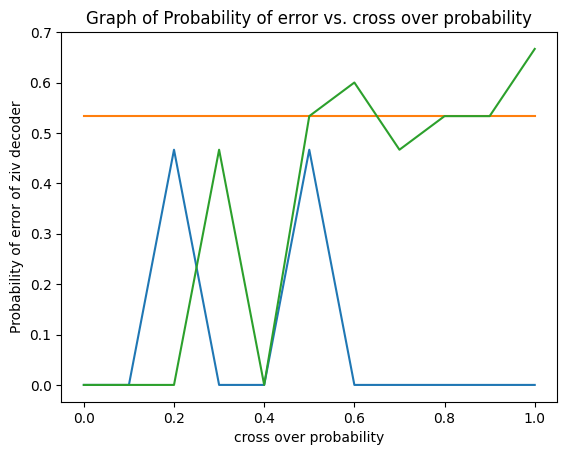

In [164]:
t=np.random.randint(0, 8, 500)
#for i in t:
 #   encoded_message =np.concatenate([ codebook[i], encoded_message])

encoded_message =codebook[1]
#encoded_message =np.concatenate([ codebook[2], codebook[0], codebook[1],codebook[3],codebook[2], codebook[0], codebook[1],codebook[3], codebook[7],codebook[6], codebook[4],codebook[5],codebook[3], codebook[7],codebook[6], codebook[4],codebook[5] ])
#cross_over = sorted([random.uniform(0, 1) for _ in range(50)])
cross_over= [i * 0.1 for i in range(0, 11)]
n=len(encoded_message)
P_err_ziv=[]
P_err_MMI=[]
P_err_ML=[]
for i in cross_over:
    received_message = noisy_channel(encoded_message, i)
    y_ziv=[]
    y_mmi=[]
    y_ml=[]
    for j in range(len(received_message)//15):
        #ZIV
        u=[]
        for x in codebook:
            u.append(univ_dec(15,received_message[j*15:(j+1)*15],x))
        min_index = u.index(min(u))
        y_ziv=np.concatenate([y_ziv, codebook[min_index]])
        #MMI
        y_mmi= np.concatenate([y_mmi, mmi_decoder(codebook,received_message[j*15:(j+1)*15])])
        print(y_mmi)
        #ML
        y_ml= np.concatenate([y_ml, max_likelihood_decoder(received_message[j*15:(j+1)*15], codebook)])

    P_err_ziv.append(np.sum(encoded_message!=y_ziv)/len(y_ziv))
    P_err_MMI.append(np.sum(encoded_message!=y_mmi)/len(y_mmi))
    P_err_ML.append(np.sum(encoded_message!=y_ml)/len(y_ml))

print(P_err_ziv)
print(P_err_MMI)
print(P_err_ML)
# plot the graph
plt.plot(cross_over, P_err_ziv)
plt.plot(cross_over, P_err_MMI)
plt.plot(cross_over, P_err_ML)
# add labels and title
plt.xlabel('cross over probability')
plt.ylabel('Probability of error of ziv decoder')
plt.title('Graph of Probability of error vs. cross over probability')

# display the graph
plt.show()
  
